In [1]:
# import general classes for data processing
import ruptures as rpt
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns

from sklearn.metrics import accuracy_score

from sklearn.preprocessing import LabelEncoder

# plotting cmap
from matplotlib.cm import get_cmap

# import for loop and XGboost
from tqdm.notebook import tqdm

# import MLP
from sklearn.neural_network import MLPClassifier

In [2]:
df = pd.read_csv('assets\data_rem.csv')

subjects = list(df.subject.unique())
subjects.remove("Mario")
subjects.remove("Hanaa")
subjects.remove("Alex")
subjects.remove("David")
subjects.remove("Francisco")

df = df[df['subject'].isin(subjects)]
subjects

['Aarushi', 'Ester', 'Imen', 'Lluis', 'Sergi', 'Sergio']

In [3]:
# no need to run this, we are loading the saved matrices in the next section

test_sets = [1, 2, 3]
train_sets = [1, 2, 3]

subjects = list(df.subject.unique())
num_subjects = len(subjects)
num_test_sets = len(test_sets)
num_train_sets = len(train_sets)

accuracies_pre = np.zeros((num_subjects,))
accuracies_post = np.zeros((num_subjects, num_train_sets, num_test_sets))

for subject_idx, person_test in  tqdm(enumerate(subjects)):

    model = MLPClassifier(random_state=1,hidden_layer_sizes =50,max_iter=500)

    selected_columns = [ 'mav_0', 'mav_1', 'mav_2', 'mav_3', 'mav_4', 'mav_5', 'mav_6', 'mav_7',
    'rms_0', 'rms_1', 'rms_2', 'rms_3', 'rms_4', 'rms_5', 'rms_6', 'rms_7',
    'ssc_0', 'ssc_1', 'ssc_2', 'ssc_3', 'ssc_4', 'ssc_5', 'ssc_6', 'ssc_7',
    'wl_0', 'wl_1', 'wl_2', 'wl_3', 'wl_4', 'wl_5', 'wl_6', 'wl_7', 'var_0',
    'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7', 'iasd_0',
    'iasd_1', 'iasd_2', 'iasd_3', 'iasd_4', 'iasd_5', 'iasd_6', 'iasd_7',
    'iatd_0', 'iatd_1', 'iatd_2', 'iatd_3', 'iatd_4', 'iatd_5', 'iatd_6',
    'iatd_7']

    df_train = df[(df['subject'] != person_test)]
    df_test = df[(df['subject'] == person_test)]

    X_train = df_train[selected_columns]
    y_train = df_train['gesture']
    X_test = df_test[selected_columns]
    y_test = df_test['gesture']        

    label_encoder = LabelEncoder()
    Y_encoded = label_encoder.fit_transform(y_train)
    y_train = Y_encoded 

    Y_encoded2 = label_encoder.fit_transform(y_test)
    y_test = Y_encoded2 

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    predictions = [round(value) for value in y_pred]
    predicted_labels_decoded = label_encoder.inverse_transform(predictions)

    accuracy_pre = accuracy_score(y_test, predictions)*100
    accuracies_pre[subject_idx] = accuracy_pre

    for train_idx, Take_to_train in enumerate(train_sets):
        for test_idx, Take_to_test in enumerate(test_sets):

            df2 = df[(df['subject'] == person_test)] 
            model2 = model

            df_train2 = df2[(df2['take'] == Take_to_train)]
            df_test2 = df2[(df2['take'] == Take_to_test)]

            X_train2 = df_train2[selected_columns]
            y_train2 = df_train2['gesture']
            X_test2 = df_test2[selected_columns]
            y_test2 = df_test2['gesture']

            label_encoder = LabelEncoder()
            Y_encoded = label_encoder.fit_transform(y_train2)
            y_train2 = Y_encoded 

            Y_encoded2 = label_encoder.fit_transform(y_test2)
            y_test2 = Y_encoded2 

            model2.partial_fit(X_train2, y_train2, classes=np.unique(y_train2))

            y_pred = model2.predict(X_test2)

            predictions = [round(value) for value in y_pred]
            predicted_labels_decoded = label_encoder.inverse_transform(predictions)
            
            accuracy_post = accuracy_score(y_test2, predictions)*100
            accuracies_post[subject_idx, train_idx, test_idx] = accuracy_post


np.save("accuracies_pre.npy", accuracies_pre)
np.save("accuracies_post.npy", accuracies_post)

0it [00:00, ?it/s]

c:\Users\fents\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
c:\Users\fents\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
c:\Users\fents\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
c:\Users\fents\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
c:\Users\fents\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


: 

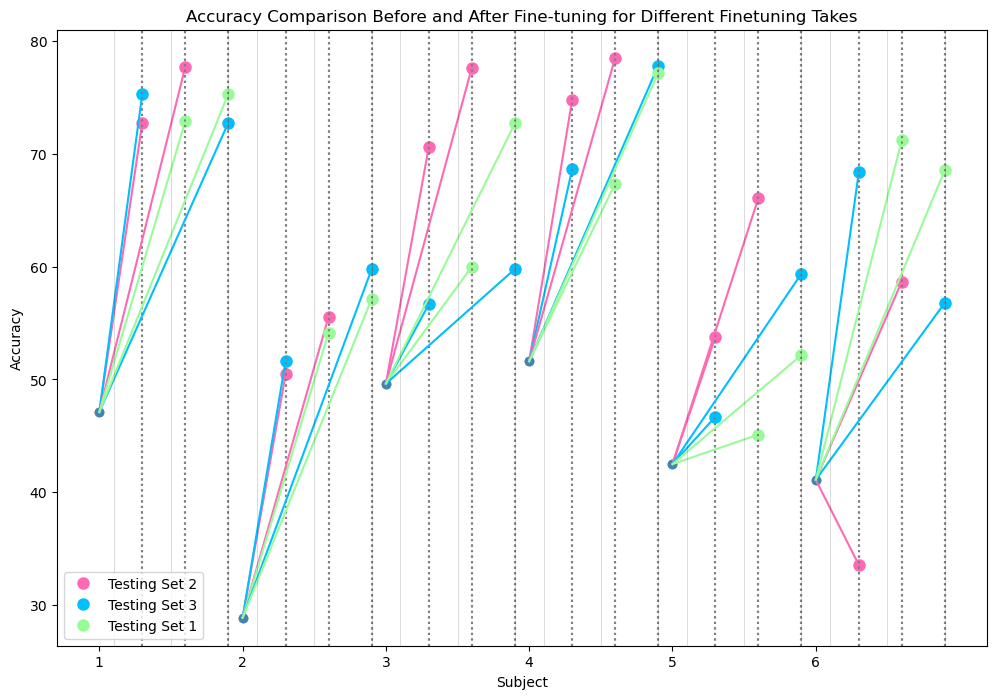

In [163]:
import numpy as np
import matplotlib.pyplot as plt

# Load data
accuracies_pre = np.load("accuracies_pre.npy")
accuracies_post = np.load("accuracies_post.npy")

# Reshape post-accuracies data
reshaped_accuracies = []
for matrix in accuracies_post:
    np.fill_diagonal(matrix, 0)
    non_zero_data = matrix[matrix != 0]
    reshaped_data = non_zero_data[:6].reshape(3, 2)
    reshaped_accuracies.append(reshaped_data)

# Constructing a matrix for the initial accuracies shaped (3, 2)
initial_accuracies_matrix = np.repeat(accuracies_pre.reshape(-1, 1), 2, axis=1)

# Define brighter colors for the testing sets
testing_set_colors = {
    2: '#FF69B4',  # Bright pink
    3: '#00BFFF',  # Deep sky blue
    1: '#98FB98'   # Pale green
}

# Plotting
plt.figure(figsize=(12, 8))
subject_indices = np.arange(1, len(accuracies_pre) + 1)

for i, (initial_accuracy, fine_tuned_data) in enumerate(zip(initial_accuracies_matrix, reshaped_accuracies)):
    # Initial accuracy point
    plt.plot(subject_indices[i], initial_accuracy[0], marker='o', markersize=6, color='#4682B4')  # Changed to dark blue
    plt.plot(subject_indices[i], initial_accuracy[1], marker='o', markersize=6, color='#4682B4')  # Changed to dark blue
    
    # Plotting fine-tuned accuracies and connecting lines
    for j, fine_tuned_accuracy in enumerate(fine_tuned_data):
        # Calculate x-coordinate for fine-tuned data
        fine_tuned_x_pos = subject_indices[i] + (j + 1) * 0.3
        
        # Get colors for the testing sets
        test_set_colors = [testing_set_colors[2], testing_set_colors[3]] if j == 0 else [testing_set_colors[2], testing_set_colors[1]] if j == 1 else [testing_set_colors[3], testing_set_colors[1]]
        
        # Plot fine-tuned accuracies and connecting lines
        for k, (accuracy, color) in enumerate(zip(fine_tuned_accuracy, test_set_colors)):
            plt.plot(fine_tuned_x_pos, accuracy, marker='o', markersize=8, color=color)
            plt.plot([subject_indices[i], fine_tuned_x_pos], [initial_accuracy[k], accuracy], color=color)

            # Add subtle gridlines to represent different fine-tuning sets on the x-axis
            plt.axvline(subject_indices[i] + (j + 1) * 0.3, linestyle=':', color='grey')  # Fine-tuning set separator
    
    # Add subtle gridlines to separate subjects
    plt.axvline(subject_indices[i] + 0.1, color='black', linewidth=0.5, alpha=0.2)
    plt.axvline(subject_indices[i] + 0.5, color='black', linewidth=0.5, alpha=0.2)
    plt.axvline(subject_indices[i] + 0.9, color='black', linewidth=0.5, alpha=0.2)

plt.xlabel('Subject')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison Before and After Fine-tuning for Different Finetuning Takes')
plt.xticks(subject_indices)

# Hide the original grid
plt.grid(False)

# Add legend with only testing set colors
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=f'Testing Set {i}') for i, color in testing_set_colors.items()]
plt.legend(handles=legend_handles)

# Show plot
plt.show()